In [7]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 125.3 MB/s eta 0:00:00


In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('wglc_climatology_30m_monthly.nc')

In [3]:
ds

<xarray.Dataset> Size: 50MB
Dimensions:             (lon: 720, lat: 360, time: 12, bnds: 2)
Coordinates:
  * lon                 (lon) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
  * lat                 (lat) float64 3kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * time                (time) datetime64[ns] 96B 2010-01-01 ... 2010-12-01
Dimensions without coordinates: bnds
Data variables:
    climatology_bounds  (time, bnds) float64 192B ...
    density             (time, lat, lon) float32 12MB ...
    power_median        (time, lat, lon) float32 12MB ...
    power_mean          (time, lat, lon) float32 12MB ...
    power_SD            (time, lat, lon) float32 12MB ...
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology: monthly climatology (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.15215319

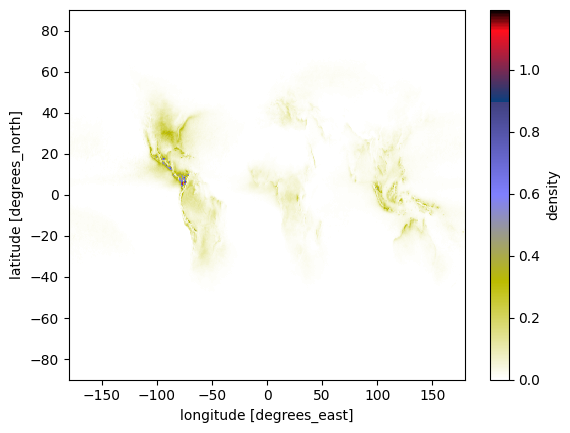

In [6]:
ds.density.sum(dim='time').plot(cmap='gist_stern_r')

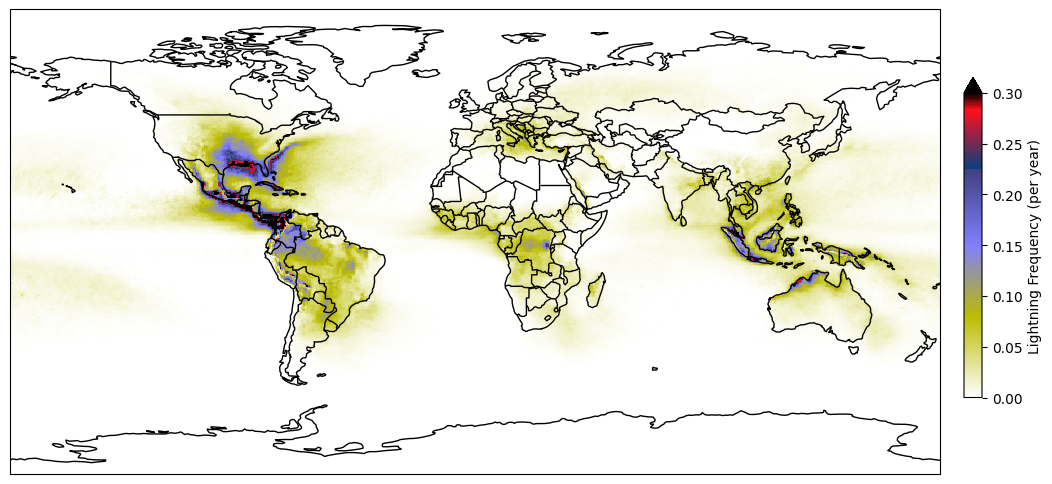

In [14]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure with custom size
fig = plt.figure(figsize=(12, 8))

# Create main plot axis with PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Compute lightning frequency per year and plot it
plot = ds.density.sum(dim='time').plot(
    ax=ax,
    cmap='gist_stern_r',
    add_colorbar=False,  # Disable default colorbar
    vmax=0.3               # Adjust if needed for your data range
)

# Add custom, smaller colorbar axis
cax = fig.add_axes([0.92, 0.3, 0.015, 0.4])
cbar = plt.colorbar(plot, cax=cax, extend='max')
cbar.set_label('Lightning Frequency (per year)')

# Add geographical features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.coastlines()

# Save the figure
plt.savefig('lightning_frequency.png', dpi=500)

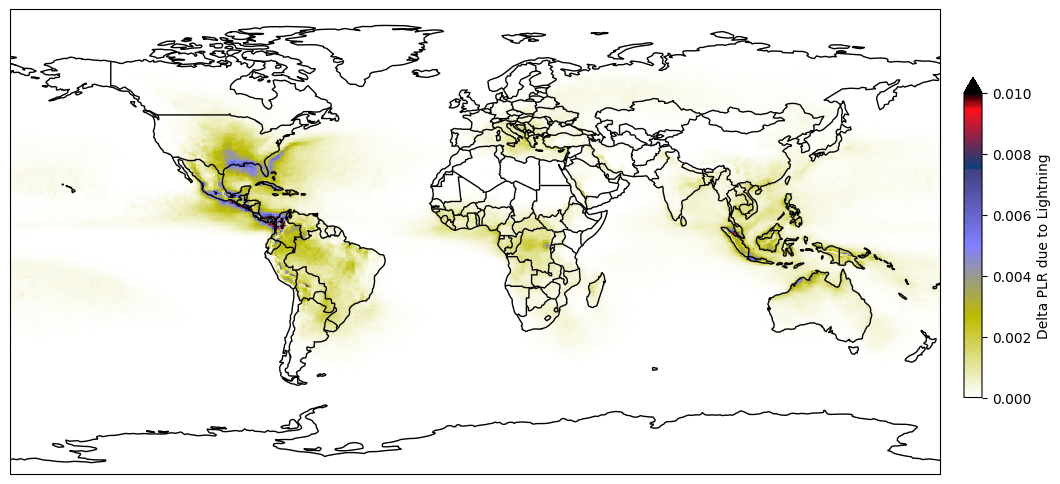

In [18]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Compute Delta PLR from lightning frequency
delta_plr = ds.density.sum(dim='time') * 0.019

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot Delta PLR
plot = delta_plr.plot(
    ax=ax,
    cmap='gist_stern_r',
    add_colorbar=False,
    vmax=0.01  # Adjust based on your data distribution
)

# Add custom colorbar
cax = fig.add_axes([0.92, 0.3, 0.015, 0.4])
cbar = plt.colorbar(plot, cax=cax, extend='max')
cbar.set_label('Delta PLR due to Lightning')

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.coastlines()

# Save the plot
plt.savefig('delta_plr_lightning.png', dpi=500)